In [1]:
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import scipy
import scipy.misc
import scipy.signal
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['image.cmap'] = 'gray'

In [17]:
img = pil.Image.open('imagetest3.jpg')
img
img2 = pil.Image.open('imagetest3.jpg').convert('LA')
img2
img_as_np = np.array(img2)
img_as_np
img_fft = np.fft.fft2(img_as_np)
img_fft
img0 = img2
width,height = img2.size
img4 = pil.Image.new('L',[width, height],color=0)
img4.save('image0.jpg')

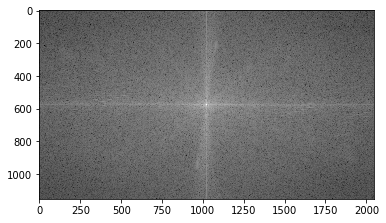

In [9]:
img = scipy.misc.imread('imagetest3.jpg',1)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f) #Shift the zero component to the center
magnitude_spectrum = np.log(np.abs(fshift))
magnitude_spectrum2 = 20*magnitude_spectrum
#plt.imshow(img)
#plt.subplot(131),plt.imshow(img, cmap = 'gray')
#plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.imshow(magnitude_spectrum, cmap = 'gray')
#plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x22880a1ddd8>,
 <matplotlib.image.AxesImage at 0x22880a98550>)

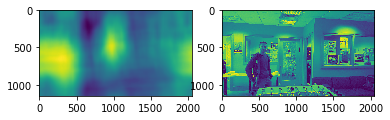

In [54]:
img = scipy.misc.imread('imagetest3.jpg',1)
img_as_np1 = np.fft.fft2(img)
img_as_np2 = np.fft.fftshift(img_as_np1)
mag_spec = np.log(np.abs(img_as_np2))
plt.imshow(mag_spec)

img2 = scipy.misc.imread('jay.jpg',1)
img2_as_np1 = np.fft.fft2(img2)
img2_as_np2 = np.fft.fftshift(img2_as_np1)
mag_spec2 = np.log(np.abs(img2_as_np2))
plt.imshow(mag_spec2)

conv = img_as_np1*img2_as_np1
conv = np.fft.ifft2(conv)
plt.subplot(121),plt.imshow(abs(conv))
plt.subplot(122),plt.imshow(np.array(img))

TypeError: unsupported operand type(s) for *: 'float' and 'function'

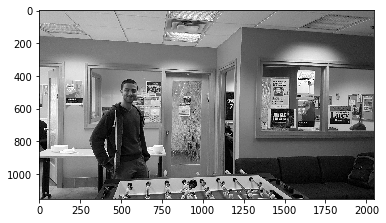

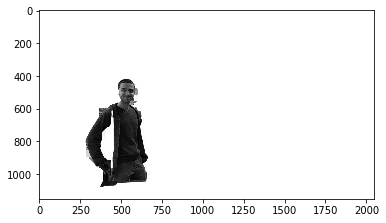

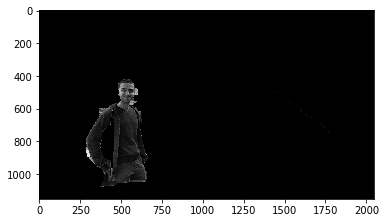

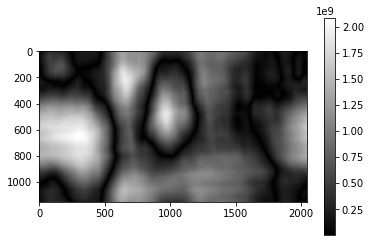

In [11]:
img1 = scipy.misc.imread('imagetest3.jpg',1)
plt.figure()
plt.imshow(img1,cmap='gray')
f1 = np.fft.fft2(img1)

img2 = scipy.misc.imread('Images/jay.jpg',1)
img2 -= np.mean(img2)
plt.figure()
plt.imshow(img2,cmap='gray')
f2 = np.fft.fft2(img2)

img3 = scipy.misc.imread('Images/blackjay2.jpg',1)
img3 -= np.mean(img3)
plt.figure()
plt.imshow(img3,cmap='gray')
f3 = np.fft.fft2(img3)

conv1 = f1*f2
conv1 = np.fft.ifft2(conv1)

plt.figure()
plt.imshow(abs(conv1),cmap='gray')#it has complex values
plt.colorbar()

conv2 = f1*np.conjugate(f2)
conv2 = np.fft.ifft2(conv2)/(np.linalg.norm(img1)*np.linalg.norm)

conv3 = f1*f3 
conv3 = np.fft.ifft2(conv3) / (np.linalg.norm(img1)*np.linalg.norm(img3))


plt.figure()
plt.imshow(abs(conv3), cmap='gray')
plt.colorbar()

conv4 = f1*np.conjugate(f3)
conv4 = np.fft.ifft2(conv4) / (np.linalg.norm(img1)*np.linalg.norm(img3))

plt.figure()
plt.imshow(abs(conv4),cmap='gray')
plt.colorbar()

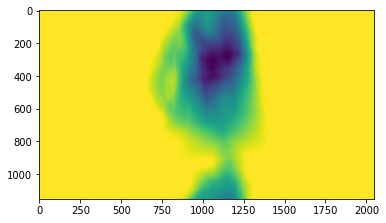

In [56]:
img1 = scipy.misc.imread('jay.jpg',1)
f1 = np.fft.fft2(img1)
img2 = scipy.misc.imread('blackjay.jpg',1)
f2 = np.fft.fft2(img2)
conv = f2*f1
conv = np.fft.ifft2(conv)

plt.imshow(abs(conv))#it has complex values
scipy.misc.imsave('whtblkconv.jpg',abs(conv))


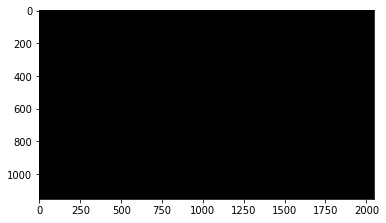

In [57]:
image = np.zeros((1152,2048,3),dtype = 'uint8')
plt.imshow(image)
scipy.misc.imsave('black.jpg',image)

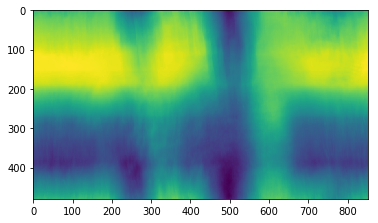

In [58]:
img1 = scipy.misc.imread('9[1].jpg',1)
f1 = np.fft.fft2(img1)
img2 = scipy.misc.imread('allblack.jpg',1)
f2 = np.fft.fft2(img2)
conv = f1*f2
conv = np.fft.ifft2(conv)

plt.imshow(abs(conv))#it has complex values
scipy.misc.imsave('snowguyconv.jpg',abs(conv))

(array([440, 440, 440, ..., 649, 649, 649], dtype=int64), array([375, 376, 377, ..., 647, 648, 649], dtype=int64))
440


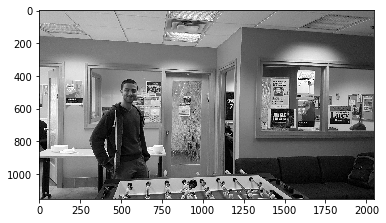

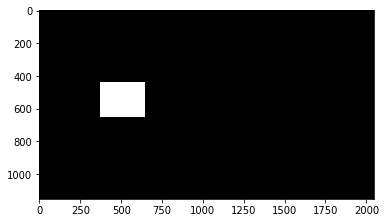

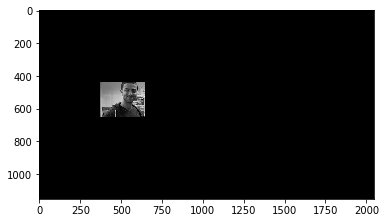

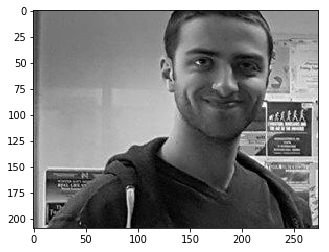

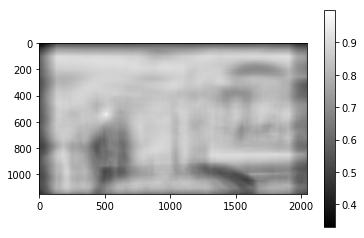

In [5]:
#Creating a script to make a mask for the image
img = scipy.misc.imread('imagetest3.jpg',1)
plt.figure()
plt.imshow(img, cmap = 'gray')

mask = np.zeros_like(img)
# mask[440:1000,325:650] = 255
mask[440:650,375:650] = 255
plt.figure()
plt.imshow(mask, cmap = 'gray')

masked = mask*img
plt.figure()
plt.imshow(masked, cmap = 'gray')

arr = np.nonzero(masked)
print(arr)
print(arr[0][0])
b = masked[arr[0][0]:arr[0][-1],arr[1][0]:arr[1][-1]]
# b -= np.mean(b)
plt.figure()
plt.imshow(b,cmap = 'gray')

p = np.zeros_like(img)
[height,length] = p.shape
[bheight,blength] = b.shape
x = int(height/2-bheight/2)
y = int(length/2-blength/2)

mask_im = np.zeros_like(img)
mask_im[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = 1.0
"""
f1 = np.fft.fft2(img)
f2 = np.fft.fft2(p)
f3 = np.fft.fft2(mask_im)
fconv = f1*f2
denom1 = np.sqrt(np.sum(f2*f3))
denom2 = np.sqrt(np.sum(b**2))"""

num = scipy.signal.fftconvolve(img,b[::-1,::-1],'same')
denom1 = np.sqrt(scipy.signal.convolve(img**2,mask_im,'same'))
denom2 = np.sqrt(np.sum(b**2))

plt.figure()
plt.imshow(num/(denom1*denom2),cmap = 'gray')
plt.colorbar()


(array([440, 440, 440, ..., 999, 999, 999], dtype=int64), array([325, 326, 327, ..., 647, 648, 649], dtype=int64))
440


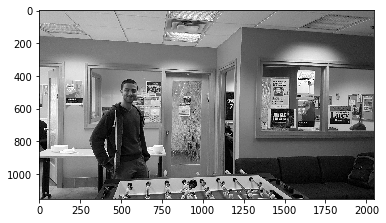

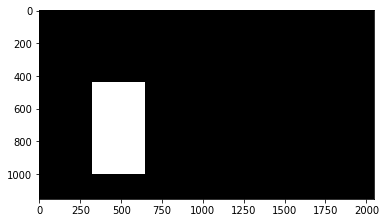

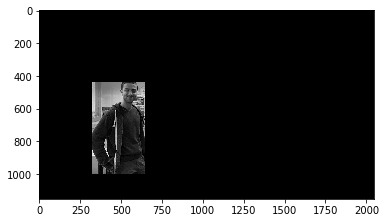

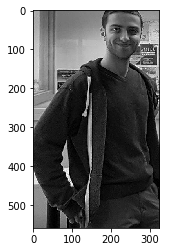

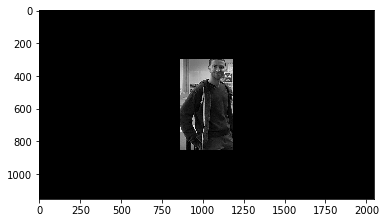

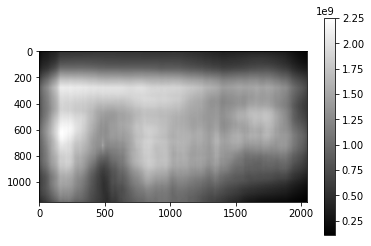

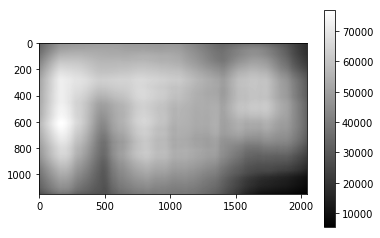

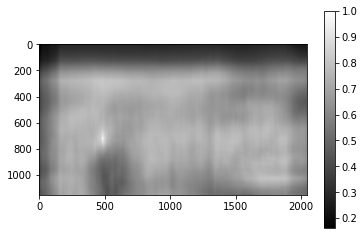

In [45]:
#Creating a script to make a mask for the image
img = scipy.misc.imread('imagetest3.jpg',1)
plt.figure()
plt.imshow(img, cmap = 'gray')

mask = np.zeros_like(img)
mask[440:1000,325:650] = 1.0
# mask[440:650,375:650] = 255
plt.figure()
plt.imshow(mask, cmap = 'gray')

masked = mask*img
plt.figure()
plt.imshow(masked, cmap = 'gray')

arr = np.nonzero(masked)
print(arr)
print(arr[0][0])
b = masked[arr[0][0]:arr[0][-1],arr[1][0]:arr[1][-1]]
#b -= np.mean(b)
plt.figure()
plt.imshow(b,cmap = 'gray')

p = np.zeros_like(img)
[height,length] = p.shape
[bheight,blength] = b.shape
x = int(height/2-bheight/2)
y = int(length/2-blength/2)
p[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = b

mask_im = np.zeros_like(p)
mask_im[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = 1.0

plt.figure()
plt.imshow(p,cmap = 'gray')

num = scipy.signal.fftconvolve(img,b[::-1,::-1],'same')
denom1 = np.sqrt(scipy.signal.fftconvolve(img**2,mask_im,'same'))
denom2 = np.sqrt(np.sum(b**2))

"""
f1 = np.fft.fft2(img)
f2 = np.fft.fft2(p[::-1,::-1])
conv = f1*f2
conv = np.fft.ifft2(conv)
plt.figure()
plt.imshow(abs(conv),cmap = 'gray')
plt.colorbar()"""


plt.figure()
plt.imshow(num,cmap = 'gray')
plt.colorbar()

plt.figure()
plt.imshow(denom1,cmap = 'gray')
plt.colorbar()

plt.figure()
plt.imshow(num/(denom1*denom2),cmap = 'gray')
plt.colorbar()


(array([1260, 1260, 1260, ..., 1349, 1349, 1349], dtype=int64), array([1030, 1031, 1032, ..., 1117, 1118, 1119], dtype=int64))
1260


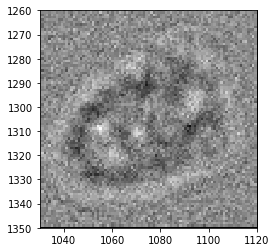

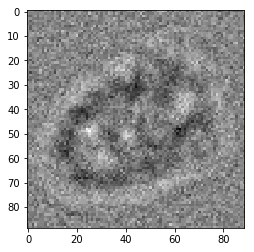

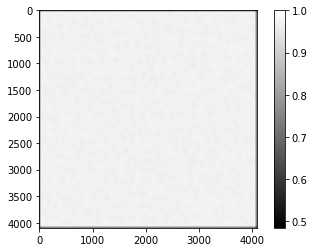

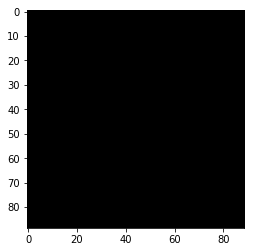

In [4]:
img = scipy.misc.imread('mgtest.png',1)
plt.figure()
plt.imshow(img, cmap='gray')

#Create a mask for a particle image
mask = np.zeros_like(img)
mask[1260:1350, 1030:1120] = 255

masked = mask*img
plt.imshow(masked, cmap = 'gray')
plt.xlim(1030,1120)
plt.ylim(1350,1260)

#Gets an image of just the particle
arr = np.nonzero(masked)
print(arr)
print(arr[0][0])
b = masked[arr[0][0]:arr[0][-1],arr[1][0]:arr[1][-1]]
#b -= np.mean(b)
plt.figure()
plt.imshow(b,cmap = 'gray')

#create an image with the particle in center, same size as img
p = np.zeros_like(img)
[height,length] = p.shape
[bheight,blength] = b.shape
x = int(height/2-bheight/2)
y = int(length/2-blength/2)


p[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = b
mask_im = np.zeros_like(img)
mask_im[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = 1.0

plt.figure()
plt.imshow(p,cmap = 'gray')


num = scipy.signal.fftconvolve(img,b[::-1,::-1],'same')
denom1 = np.sqrt(scipy.signal.fftconvolve(img**2,mask_im,'same'))
denom2 = np.sqrt(np.sum(b**2))

plt.figure()
plt.imshow(num/(denom1*denom2),cmap = 'gray')
plt.colorbar()

box = np.ones_like(b)
plt.figure()
plt.imshow(box,cmap = 'gray')



In [ ]:
def normalized_cc(I,T):
    # zero padding the template
    # Create mask of zero-padded template
    # Compute correlations of I and I**2
    # Compute and return normalized cross-correlation
    pass

def fast_convolve(I,T):
    pass





(array([1260, 1260, 1260, ..., 1349, 1349, 1349], dtype=int64), array([1030, 1031, 1032, ..., 1117, 1118, 1119], dtype=int64))
1260


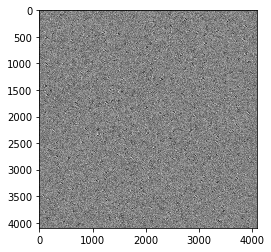

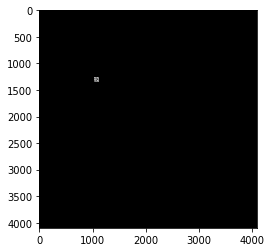

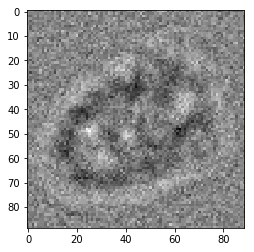

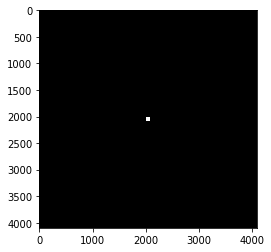

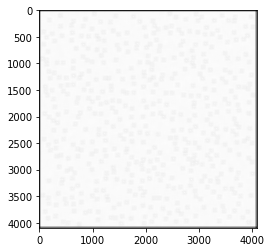

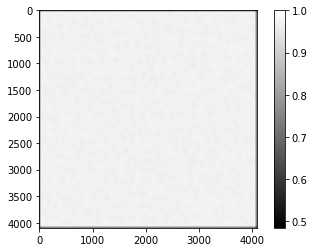

In [7]:
img = scipy.misc.imread('mgtest.png',1)
plt.figure()
plt.imshow(img, cmap='gray')

#Create a mask for a particle image
mask = np.zeros_like(img)
mask[1260:1350, 1030:1120] = 255

#Pull a particle image
masked = mask*img
plt.figure()
plt.imshow(masked, cmap = 'gray')

#Gets an image of just the particle
arr = np.nonzero(masked)
print(arr)
print(arr[0][0])
b = masked[arr[0][0]:arr[0][-1],arr[1][0]:arr[1][-1]]
#b -= np.mean(b)

plt.figure()
plt.imshow(b,cmap = 'gray')

[height,length] = img.shape
[bheight,blength] = b.shape
x = int(height/2-bheight/2)
y = int(length/2-blength/2)

#Creates a mask of img with a square the size of b in the center
mask_im = np.zeros_like(img)
mask_im[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = 1.0
plt.figure()
plt.imshow(mask_im, cmap='gray')

#Convolve the img with the inverse particle, as that is the formula for cross correlation
num = scipy.signal.fftconvolve(img,b[::-1,::-1],'same')

#Calculate certain factors to normalize the result
denom1 = np.sqrt(scipy.signal.fftconvolve(img**2,mask_im,'same'))
denom2 = np.sqrt(np.sum(b**2))

num2 = num/(denom1*denom2)

plt.figure()
plt.imshow(num, cmap='gray')

plt.figure()
plt.imshow(num2,cmap = 'gray')
plt.colorbar()


501


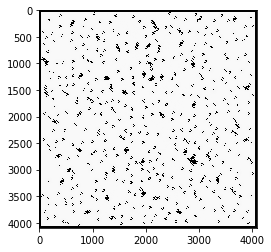

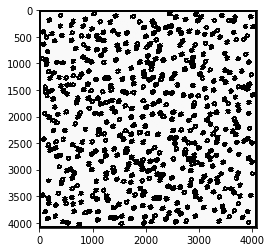

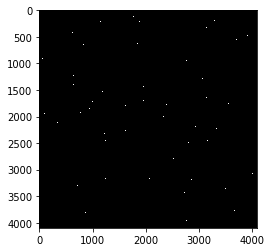

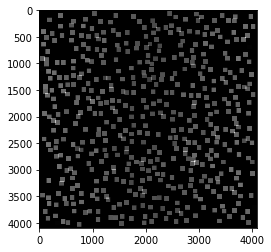

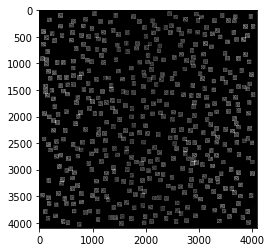

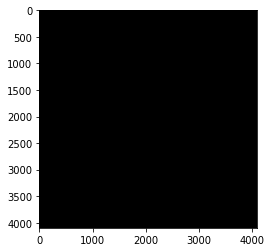

In [8]:
box = np.ones_like(b)


b1 = num2 > np.mean(num2)
b2 = num2>0.97
b3 = num2>0.975

z1 = num2*b1
z2 = num2*b2
z3 = num2*b3

plt.figure()
plt.imshow(z1, cmap = 'gray')
plt.figure()
plt.imshow(z2, cmap = 'gray')
plt.figure()
plt.imshow(z3, cmap = 'gray')

num3 = scipy.signal.fftconvolve(z3, box,'same')
plt.figure()
plt.imshow(num3, cmap = 'gray')

num4 = num3*img
plt.figure()
plt.imshow(num4, cmap='gray')
scipy.misc.imsave('look.jpg', num4)

y = np.argmax(z3)%4096
x = np.argmax(z3)//4096
mx = z3[x,y]

mask = np.zeros((10,10));
test = np.ones((20,20))
w,u = 7,6
test[w-5:w+5,u-5:u+5] = mask

k=0
while np.amax(z3)>0.5:
    y = np.argmax(z3)%4096
    x = np.argmax(z3)//4096
    z3[x-5:x+5,y-5:y+5] = mask
    k = k+1
print(k)

plt.figure()
plt.imshow(z3, cmap="gray")
    
    
    